In [ ]:
# Лабораторная 3 статистика ФИО: Михайлова Ксения

In [25]:
import random
import numpy as np
import pandas as pd
from scipy import stats

from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [ ]:
#1. Загрузить файл auto.csv

In [26]:
data=pd.read_csv('auto.csv')

In [27]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [28]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [50]:
data.mean()

symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64

In [51]:
data.median()

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

In [ ]:
#3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [29]:
corr = data.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


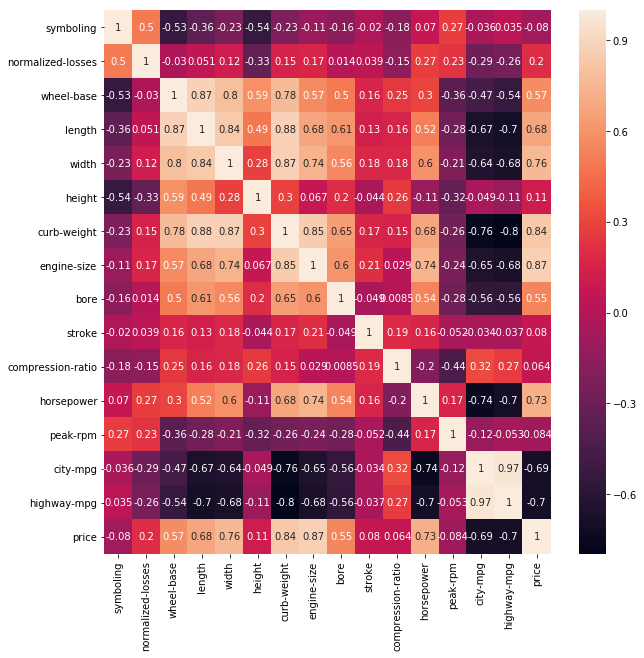

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

In [31]:
price = [float(w) for w in data['price']]

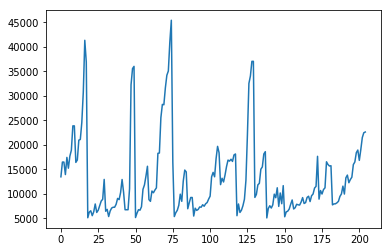

In [32]:
plt.plot(price)

In [33]:
kurtosis(price)

2.848082544390688

In [34]:
skew(price)

1.7534486514523662

In [ ]:
#5. Визуализировать несколько взаимосвязей между переменными

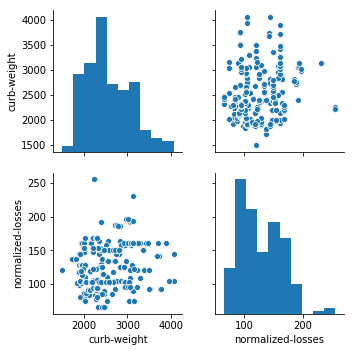

In [69]:
sns.pairplot(data, vars=['curb-weight', 'normalized-losses'],
                 kind='scatter') 

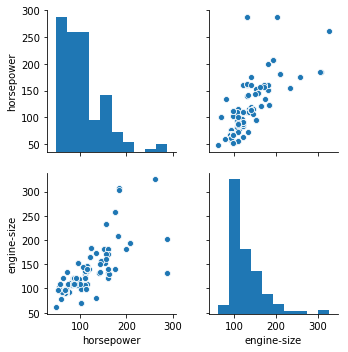

In [39]:
sns.pairplot(data, vars=['horsepower', 'engine-size'],
                 kind='scatter') 

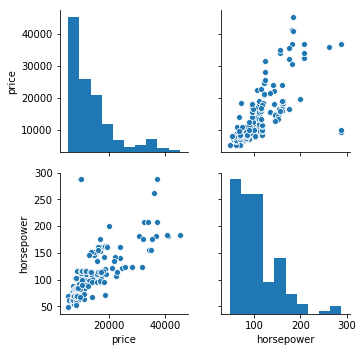

In [83]:
sns.pairplot(data, vars=['price', 'horsepower'],
                 kind='scatter')

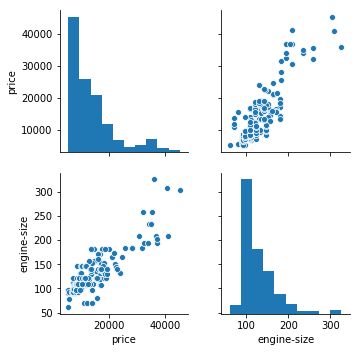

In [65]:
sns.pairplot(data, vars=['price', 'engine-size'],
                 kind='scatter')

In [ ]:
#6. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [70]:
stats.ttest_ind(data['city-mpg'], data['highway-mpg'])

Ttest_indResult(statistic=-8.338312640543368, pvalue=1.1688699865371373e-15)

In [71]:
stats.ttest_rel(data['city-mpg'], data['highway-mpg'])

Ttest_relResult(statistic=-48.190131034815096, pvalue=1.9665445899143185e-113)

In [72]:
stats.ttest_1samp(data['city-mpg'] - data['highway-mpg'], 0)

Ttest_1sampResult(statistic=-48.190131034815096, pvalue=1.9665445899143185e-113)

In [73]:
stats.ttest_ind(data['price'], data['engine-size'])

Ttest_indResult(statistic=23.30023364531501, pvalue=5.653799932442315e-77)

In [74]:
stats.ttest_rel(data['price'], data['engine-size'])

Ttest_relResult(statistic=23.405210016953998, pvalue=1.0818423184623213e-59)

In [79]:
stats.ttest_1samp(data['price'] - data['engine-size'], 0)

Ttest_1sampResult(statistic=23.405210016953998, pvalue=1.0818423184623213e-59)

In [84]:
stats.ttest_ind(data['price'], data['horsepower'])

Ttest_indResult(statistic=23.337064505286627, pvalue=3.909801820534587e-77)

In [85]:
stats.ttest_rel(data['price'], data['horsepower'])

Ttest_relResult(statistic=23.42842625428077, pvalue=9.333160604550755e-60)

In [86]:
stats.ttest_1samp(data['price'] - data['horsepower'], 0)

Ttest_1sampResult(statistic=23.42842625428077, pvalue=9.333160604550755e-60)